<a href="https://colab.research.google.com/github/Aayushmatkar/BMG5111-datascience-for-engineers/blob/main/glaucomaW_csa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import files

# Upload the Kaggle API key (kaggle.json) that you downloaded
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"priyankapratapmore","key":"b505f1e201b651e9170182e297d0c783"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d sabari50312/fundus-pytorch

100% 3.81G/3.82G [02:45<00:00, 27.0MB/s]
100% 3.82G/3.82G [02:45<00:00, 24.7MB/s]


In [5]:
!unzip -q  fundus-pytorch.zip -d dataset

##using CNN to train

In [6]:
import tensorflow as tf
from keras.api._v2.keras.preprocessing.image import ImageDataGenerator

# training directories
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/test'

#ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# shaping the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

# model fitting
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Found 8621 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


Epoch 1/10
100/100 [==============================] - 154s 2s/step - loss: 0.6957 - accuracy: 0.6012 - val_loss: 0.6377 - val_accuracy: 0.6590
Epoch 2/10
100/100 [==============================] - 172s 2s/step - loss: 0.6084 - accuracy: 0.7012 - val_loss: 0.5506 - val_accuracy: 0.7680
Epoch 3/10
100/100 [==============================] - 161s 2s/step - loss: 0.5770 - accuracy: 0.7125 - val_loss: 0.5496 - val_accuracy: 0.7420
Epoch 4/10
100/100 [==============================] - 157s 2s/step - loss: 0.5432 - accuracy: 0.7465 - val_loss: 0.4961 - val_accuracy: 0.7640
Epoch 5/10
100/100 [==============================] - 159s 2s/step - loss: 0.5216 - accuracy: 0.7480 - val_loss: 0.4695 - val_accuracy: 0.7780
Epoch 6/10
100/100 [==============================] - 157s 2s/step - loss: 0.4892 - accuracy: 0.7810 - val_loss: 0.4687 - val_accuracy: 0.7850
Epoch 7/10
100/100 [==============================] - 153s 2s/step - loss: 0.4742 - accuracy: 0.7880 - val_loss: 0.4296 - val_accuracy: 0.8080

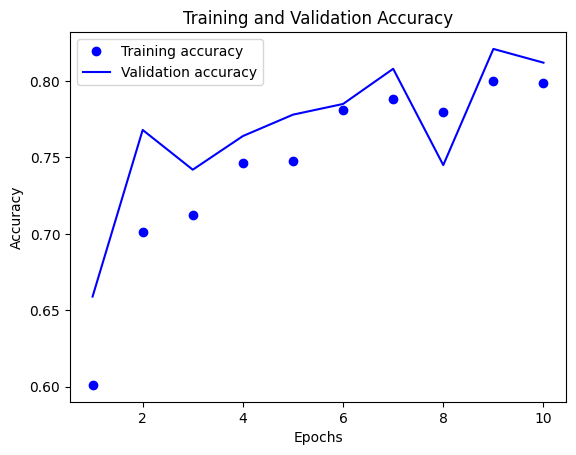

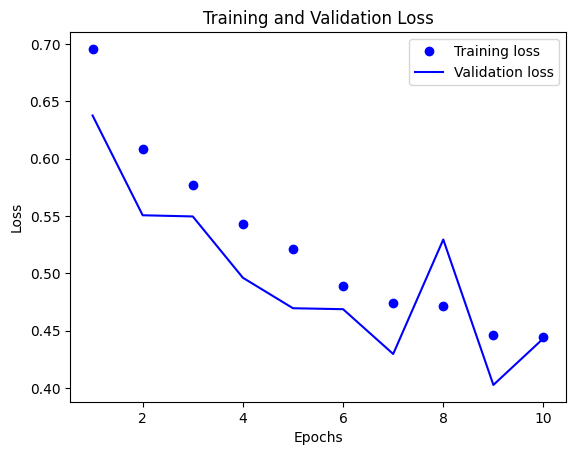

In [9]:
import matplotlib.pyplot as plt

# Training history contains information about accuracy and loss during training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##=========================================================================


##cosine annealing 1

Found 8621 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


Epoch 1/15
100/100 [==============================] - 187s 2s/step - loss: 0.7718 - accuracy: 0.6355 - val_loss: 0.6196 - val_accuracy: 0.6850 - lr: 0.0010
Epoch 2/15
100/100 [==============================] - 176s 2s/step - loss: 0.6202 - accuracy: 0.6770 - val_loss: 0.6013 - val_accuracy: 0.6850 - lr: 9.7553e-04
Epoch 3/15
100/100 [==============================] - 159s 2s/step - loss: 0.5751 - accuracy: 0.7245 - val_loss: 0.6034 - val_accuracy: 0.6510 - lr: 8.8237e-04
Epoch 4/15
100/100 [==============================] - 177s 2s/step - loss: 0.5710 - accuracy: 0.7275 - val_loss: 0.5575 - val_accuracy: 0.7270 - lr: 7.0051e-04
Epoch 5/15
100/100 [==============================] - 183s 2s/step - loss: 0.5172 - accuracy: 0.7615 - val_loss: 0.5110 - val_accuracy: 0.7640 - lr: 4.5849e-04
Epoch 6/15
100/100 [==============================] - 155s 2s/step - loss: 0.5052 - accuracy: 0.7592 - val_loss: 0.5082 - val_accuracy: 0.7570 - lr: 2.2924e-04
Epoch 7/15
100/100 [========================

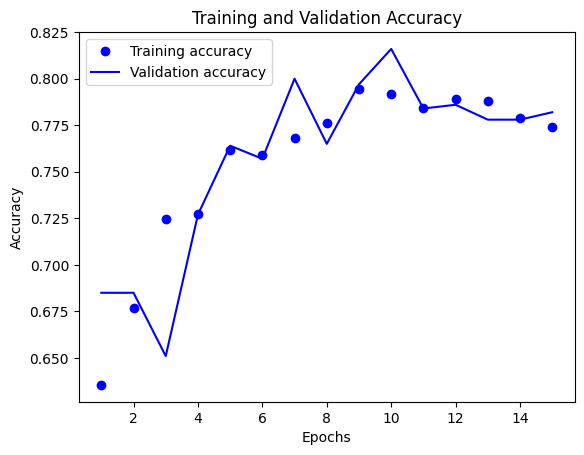

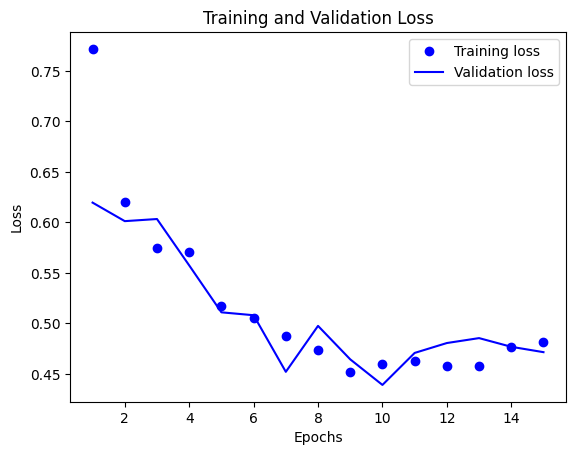

In [11]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import math

# Define a cosine annealing learning rate schedule
def cosine_annealing(epoch, lr):
    epochs = 10  # Adjust the total number of epochs as needed
    return lr * 0.5 * (1 + math.cos(math.pi * epoch / epochs))

# Training directories
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/test'

# ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Shaping the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model with initial learning rate
initial_lr = 0.001
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=initial_lr),
              metrics=['accuracy'])

# Applying cosine annealing learning rate schedule
lr_scheduler = LearningRateScheduler(cosine_annealing)

# Model fitting with learning rate scheduler
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[lr_scheduler])

# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plotting accuracy
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#cosine annealing 2


Found 8621 images belonging to 2 classes.
Found 2874 images belonging to 2 classes.


Epoch 1/15
100/100 [==============================] - 193s 2s/step - loss: 0.6800 - accuracy: 0.6180 - val_loss: 0.6772 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 2/15
100/100 [==============================] - 177s 2s/step - loss: 0.6181 - accuracy: 0.6760 - val_loss: 0.6163 - val_accuracy: 0.6890 - lr: 9.8907e-04
Epoch 3/15
100/100 [==============================] - 168s 2s/step - loss: 0.5776 - accuracy: 0.7200 - val_loss: 0.5794 - val_accuracy: 0.6880 - lr: 9.4632e-04
Epoch 4/15
100/100 [==============================] - 179s 2s/step - loss: 0.5645 - accuracy: 0.7245 - val_loss: 0.5320 - val_accuracy: 0.7380 - lr: 8.5595e-04
Epoch 5/15
100/100 [==============================] - 186s 2s/step - loss: 0.5391 - accuracy: 0.7330 - val_loss: 0.5199 - val_accuracy: 0.7410 - lr: 7.1435e-04
Epoch 6/15
100/100 [==============================] - 177s 2s/step - loss: 0.4921 - accuracy: 0.7673 - val_loss: 0.4602 - val_accuracy: 0.7910 - lr: 5.3576e-04
Epoch 7/15
100/100 [========================

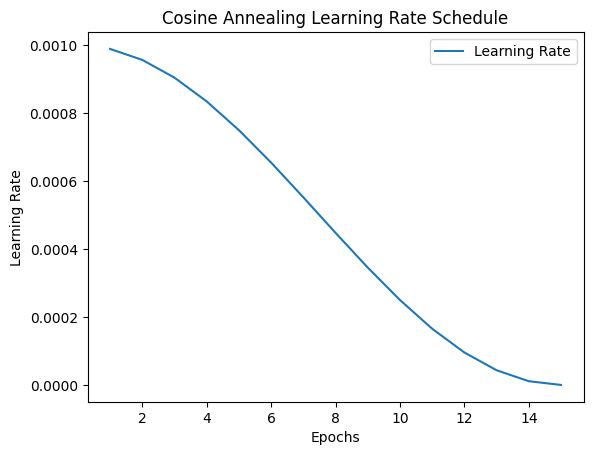

In [19]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import math

# Define a cosine annealing learning rate schedule
def cosine_annealing(epoch, lr):
    epochs = 15  # Adjust the total number of epochs as needed
    return lr * 0.5 * (1 + math.cos(math.pi * epoch / epochs))

# Training directories
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/test'

# ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# Shaping the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model with initial learning rate
initial_lr = 0.001
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=initial_lr),
              metrics=['accuracy'])

# Applying cosine annealing learning rate schedule
lr_scheduler = LearningRateScheduler(cosine_annealing)

# Model fitting with learning rate scheduler
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[lr_scheduler])

# Plotting learning rate
lr_values = [cosine_annealing(epoch, initial_lr) for epoch in range(1, 16)]  # Assuming 15 epochs
plt.plot(range(1, 16), lr_values, label='Learning Rate')
plt.title('Cosine Annealing Learning Rate Schedule')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# Plotting accuracy and loss
# ... (rest of the code remains the same)
#CHANGES FOR COSINE ANNEALING WERE IMPLEMENTED


In [20]:
# Save the entire model to a file
model.save('csa_glaucoma1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##=============================================================================

## testing the model


In [7]:
from keras.api._v2.keras.preprocessing import image
import numpy as np


img_path = '/content/dataset/val/0/BEH-349.png'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


#prediction part
prediction = model.predict(img_tensor)
print(prediction)

#printing th eresults
#future reference 0.5 is set since the dataset was a binary form of data so 0.5 is a good actuation to trigger the results
if prediction > 0.5:
    print("The model predicts this image is labeled '1'")
else:
    print("The model predicts this image is labeled '0'")


1/1 [==============================] - 0s 153ms/step
[[0.2623728]]
The model predicts this image is labeled '0'


Please enter the path to your image: /content/dataset/val/1/BEH-126.png


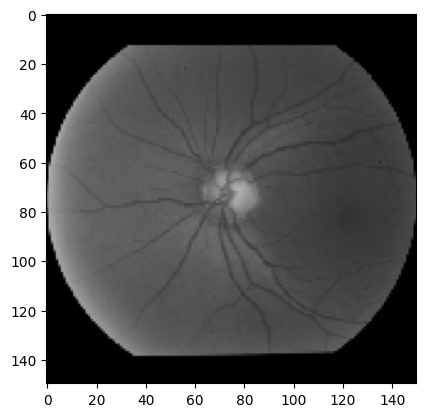

1/1 [==============================] - 0s 40ms/step
[[0.7804221]]
Glaucoma Detected


In [24]:
from keras.api._v2.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get the image path from the user
img_path = input("Please enter the path to your image: ")

# Load the image
img = image.load_img(img_path, target_size=(150, 150))

# Display the image
plt.imshow(img)
plt.show()

# Preprocess the image
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

# Use the model to predict the label of the new image
prediction = model.predict(img_tensor)
print(prediction)
# Print the prediction
if prediction > 0.5:
    print("Glaucoma Detected")
else:
    print("No Glaucoma ")


/content/dataset/test/1/CRFO-v4-42.png